In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plot Function

In [3]:
def plot_result(data, x, y, hue):
    fig, ax = plt.subplots(figsize=(20,8))
    for l in np.unique(data[hue]):
        tmp = data[data[hue] == l]
        ax.plot(tmp[x].to_numpy(),tmp[y].to_numpy(), label =l)
        ax.scatter(tmp[x].to_numpy(),tmp[y].to_numpy())
    ax.legend(fontsize=14, title = hue, title_fontsize = 14)
    if y == 'time':
        ax.set_ylabel(f'{y} (s)', fontsize=18)
    else:
        ax.set_ylabel(y, fontsize=18)
    ax.set_xlabel(x, fontsize=18) 

## Part 1 - Scalability Analysis of number of threads  

In [8]:
# Data import
th_2_2 = pd.read_csv('part1_nthreads_2_2.csv')
th_4_4 = pd.read_csv('part1_nthreads_4_4.csv')
th_8_8 = pd.read_csv('part1_nthreads_8_8.csv')
th_12_12 = pd.read_csv('part1_nthreads_12_12.csv')


# Create a new column on the dataset with the respective number of threads
# list_threads = ['2_2', '4_4', '8_8', '4_12', '12_12', '16_16']
list_threads = [2+2, 4+4, 8+8, 12+12]
new_column = [l for l in list_threads for _ in range(7) ]

In [9]:
# Concatenate the DataFrames using the 'concat()' function
frames = [th_2_2, th_4_4, th_8_8, th_12_12]
data = pd.concat(frames, axis=0, ignore_index=True)
data['nThreads'] = new_column
data.head()

,partitions,time,accuracy,orthogonality,nThreads
0,2,0.655764,6.673706e-16,1.438441e-15,4
1,4,0.188717,1.076409e-15,9.390809e-16,4
2,8,0.233590,1.133603e-15,1.211107e-15,4
3,12,0.327894,5.791718e-16,8.380420e-16,4
4,20,0.476058,6.804615e-16,5.184931e-16,4


#### nThreads vs Time

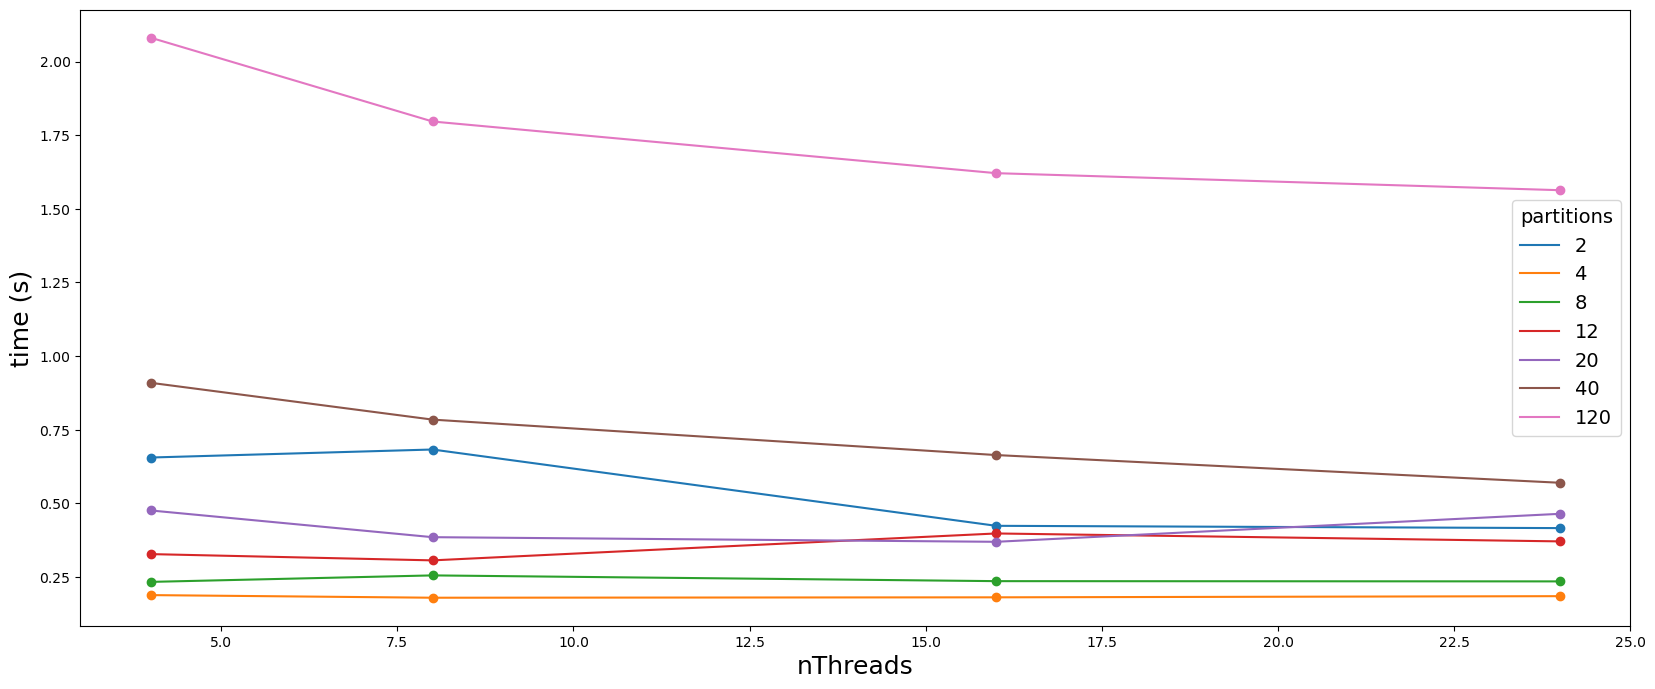

In [10]:
plot_result(data, 'nThreads' ,'time', 'partitions') 

In [11]:
# Assuming your DataFrame is named 'data' and the columns are 'nThreads', 'partitions', and 'time'
pivot_df = data.pivot('partitions', 'nThreads', 'time')

# Create the heatmap using sns.heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
ax = sns.heatmap(data=pivot_df, cmap='viridis', annot=True, fmt=".4f", cbar_kws = {'label': 'time'}, annot_kws={'size':14})  # Add annot=True to display values with 2 decimal places

# Set labels for the axes
ax.set_xlabel('nThreads', fontsize = 14)
ax.set_ylabel('partitions', fontsize = 14)

# Show the plot
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

#### nThreads vs Accuracy

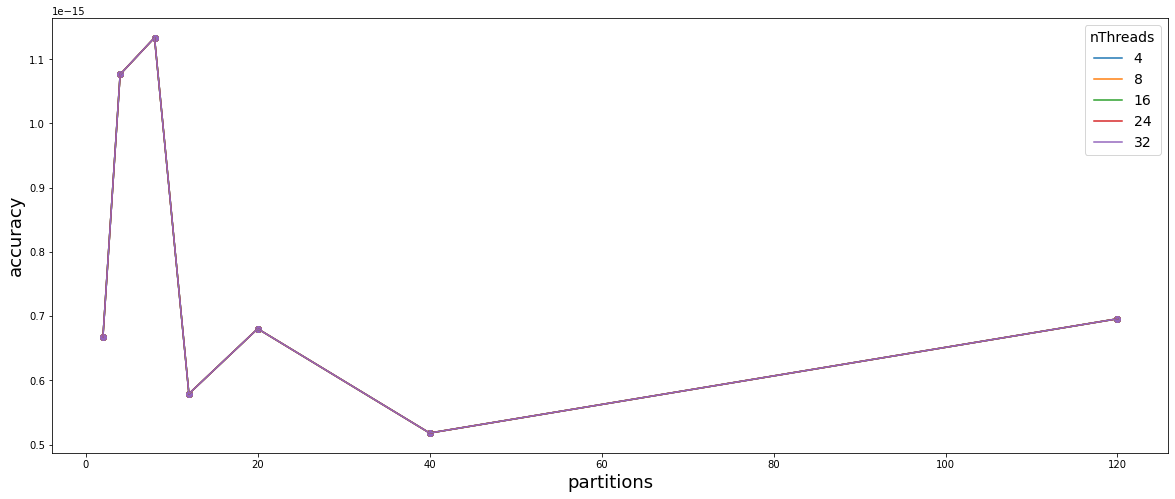

In [7]:
plot_result(data, 'partitions' ,'accuracy', 'nThreads') 

#### nThreads vs Orthogonality

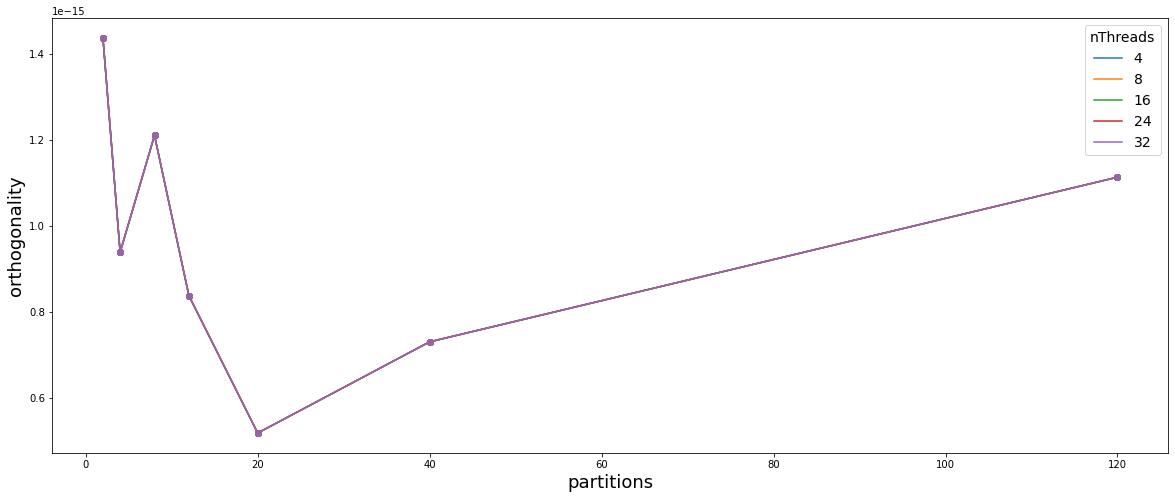

In [8]:
plot_result(data, 'partitions' ,'orthogonality', 'nThreads') 

There is an independence of number of threads on the accuracy and orthogonality. Time is the only feature that is dependent on the number of threads

#### Best metric results

In [9]:
min_time = data[data['time'] == data['time'].min()].copy()
min_time.loc[:, 'Type'] = 'Lowest Time'

min_accuracy = data[data['accuracy'] == data['accuracy'].min()].iloc[3]
min_accuracy['Type'] = 'Lowest Accuracy'

min_orthogonality = data[data['orthogonality'] == data['orthogonality'].min()].iloc[3]
min_orthogonality['Type'] = 'Lowest Orthogonality'

In [10]:
# Append the DataFrames vertically (one under the other)
min_results = min_time.append([min_accuracy, min_orthogonality])

# Reset the index of the appended DataFrame
min_results = min_results.reset_index(drop=True)

# Print the appended DataFrame
min_results

,partitions,time,accuracy,orthogonality,nThreads,Type
0,8.0,0.004026,1.133603e-15,1.211107e-15,24.0,Lowest Time
1,40.0,0.007399,5.180614e-16,7.307084e-16,24.0,Lowest Accuracy
2,20.0,0.005515,6.804615e-16,5.184931e-16,24.0,Lowest Orthogonality


### Built-in QR Decomposition

In [11]:
# Data import
BI_th_2_2 = pd.read_csv('part1_BIQR_nthreads_2_2.csv')
BI_th_4_4 = pd.read_csv('part1_BIQR_nthreads_4_4.csv')
BI_th_8_8 = pd.read_csv('part1_BIQR_nthreads_8_8.csv')
BI_th_12_12 = pd.read_csv('part1_BIQR_nthreads_12_12.csv')


# Create a new column on the dataset with the respective number of threads
# list_threads = ['2_2', '4_4', '8_8', '4_12', '12_12', '16_16']
BI_list_threads = [2+2, 4+4, 8+8, 12+12]
BI_new_column = [l for l in BI_list_threads for _ in range(7) ]

In [12]:
# Concatenate the DataFrames using the 'concat()' function
BI_frames = [BI_th_2_2, BI_th_4_4, BI_th_8_8, BI_th_12_12]
BI_data = pd.concat(BI_frames, axis=0, ignore_index=True)
BI_data['nThreads'] = BI_new_column
BI_data.tail()

,partitions,time,accuracy,orthogonality,nThreads
30,8,0.000954,1.133603e-15,1.211107e-15,32
31,12,0.000873,5.791718e-16,8.380420e-16,32
32,20,0.001064,6.804615e-16,5.184931e-16,32
33,40,0.001317,5.180614e-16,7.307084e-16,32
34,120,0.002861,5.491664e-16,8.000673e-16,32


In [13]:
data_difference = data.copy()
data_difference['relative time diff'] =  ((data['time'] - BI_data['time'])/BI_data['time'])
data_difference['accuracy'] =  (data['accuracy'] - BI_data['accuracy'])/BI_data['accuracy']
data_difference['orthogonality'] =  (data['orthogonality'] - BI_data['orthogonality'])/BI_data['orthogonality']

#### nThreads vs Time

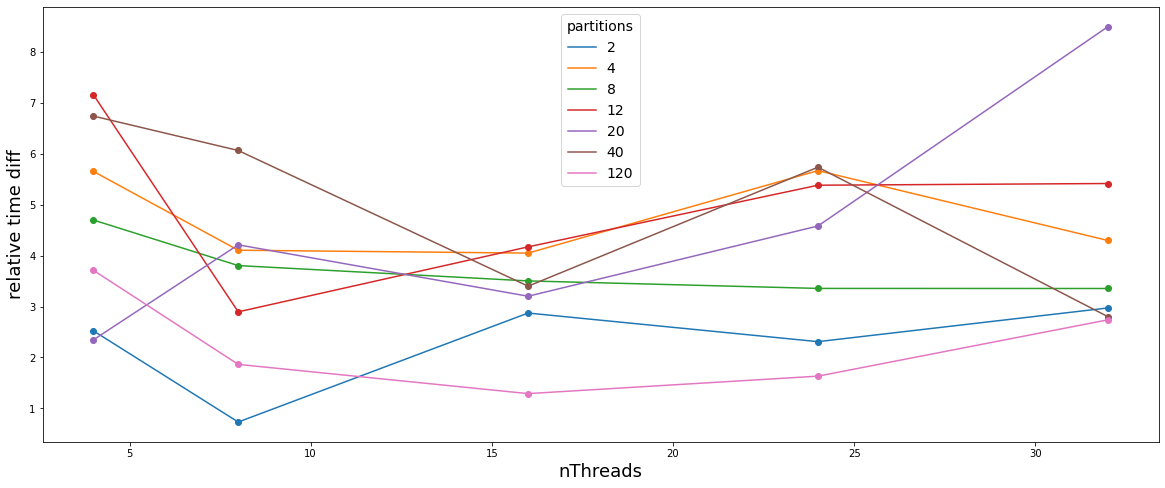

In [14]:
plot_result(data_difference, 'nThreads' ,'relative time diff', 'partitions') 

#### nThreads vs Accuracy

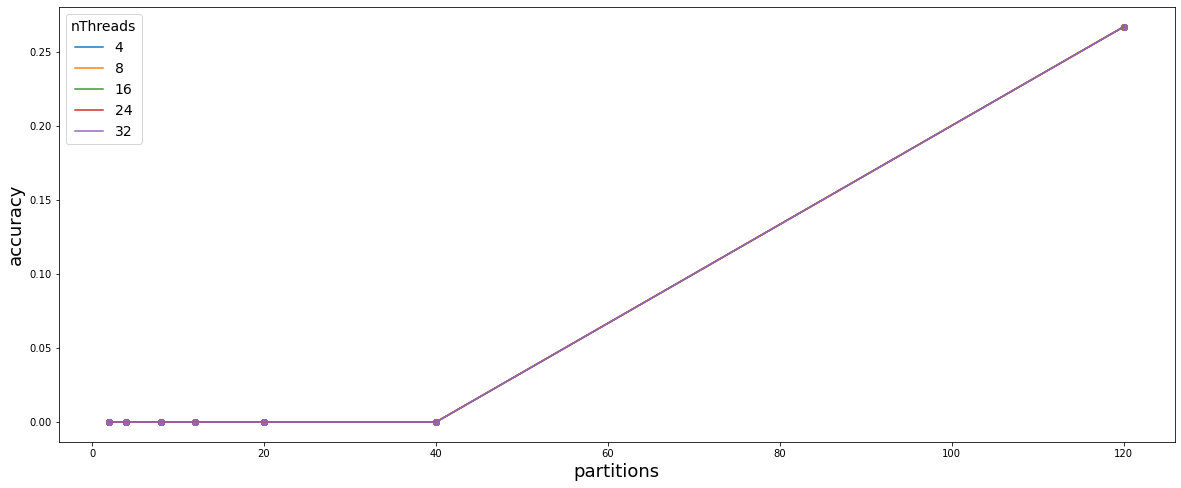

In [15]:
plot_result(data_difference, 'partitions' ,'accuracy', 'nThreads') 

#### nThreads vs Orthogonality

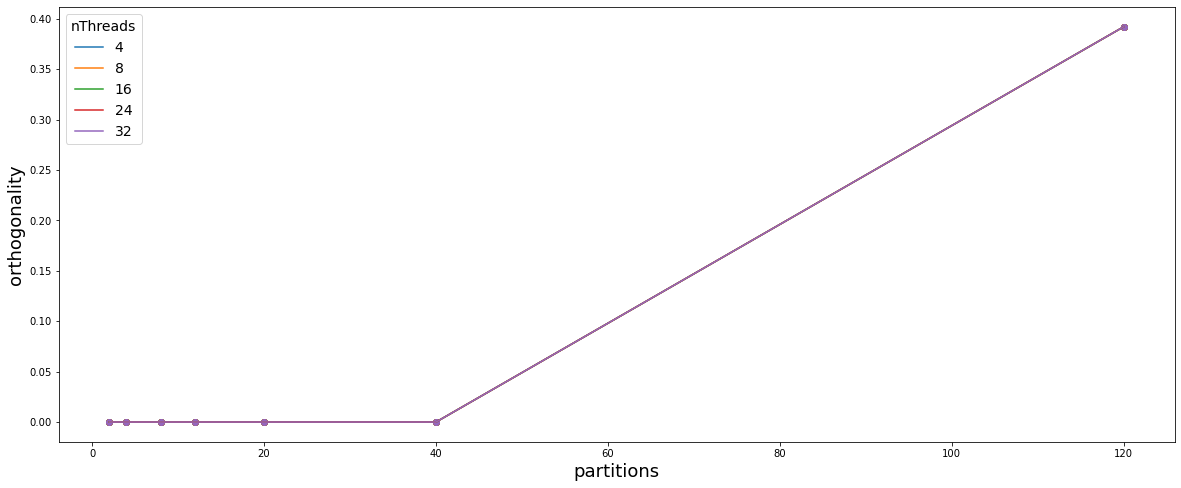

In [16]:
plot_result(data_difference, 'partitions' ,'orthogonality', 'nThreads') 

## Part 2: Scalability Analysis of number of CPUs  

In [17]:
ncpu_1_1 = pd.read_csv('part2_ncpus_1_1.csv')
ncpu_1_2 = pd.read_csv('part2_ncpus_1_2.csv')
ncpu_2_2 = pd.read_csv('part2_ncpus_2_2.csv')
ncpu_2_3 = pd.read_csv('part2_ncpus_2_3.csv')
ncpu_3_3 = pd.read_csv('part2_ncpus_3_3.csv')



list_cpus = [1+1, 1+2, 2+2, 2+3, 3+3]
new_column = [l for l in list_cpus for _ in range(7)]
# Concatenate the DataFrames using the 'concat()' function
frames = [ncpu_1_1, ncpu_1_2, ncpu_2_2, ncpu_2_3, ncpu_3_3]
data = pd.concat(frames, axis=0, ignore_index=True)
data['ncpus'] = new_column
data.tail()

,partitions,time,accuracy,orthogonality,ncpus
51,8,0.009296,1.133603e-15,1.211107e-15,16
52,12,0.006281,5.791718e-16,8.380420e-16,16
53,20,0.006268,6.804615e-16,5.184931e-16,16
54,40,0.006584,5.180614e-16,7.307084e-16,16
55,120,0.007566,6.959324e-16,1.113801e-15,16


#### nCPUs vs Time

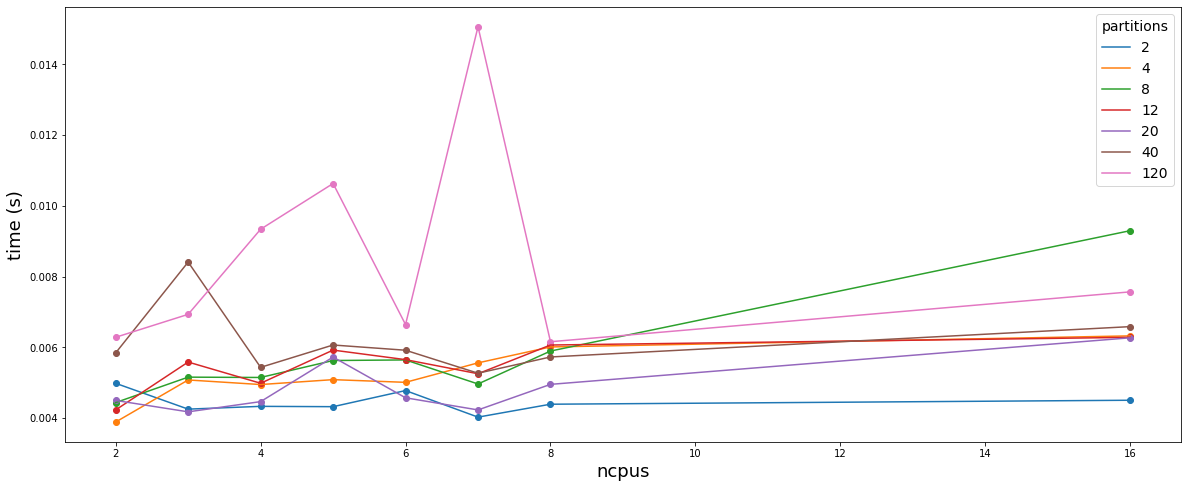

In [18]:
plot_result(data, 'ncpus' ,'time', 'partitions') 

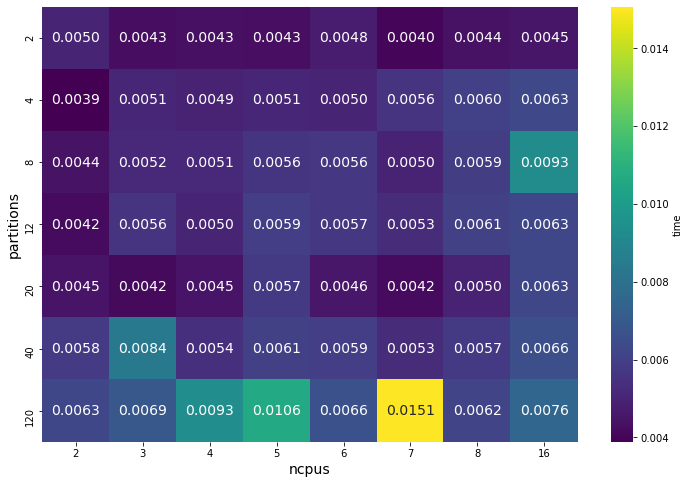

In [19]:
# Assuming your DataFrame is named 'data' and the columns are 'nThreads', 'partitions', and 'time'
pivot_df = data.pivot('partitions', 'ncpus', 'time')

# Create the heatmap using sns.heatmap
plt.figure(figsize=(12, 8))  # Set the figure size
ax = sns.heatmap(data=pivot_df, cmap='viridis', annot=True, fmt=".4f", cbar_kws = {'label': 'time'}, annot_kws={'size':14})  # Add annot=True to display values with 2 decimal places

# Set labels for the axes
ax.set_xlabel('ncpus', fontsize = 14)
ax.set_ylabel('partitions', fontsize = 14)

# Show the plot
plt.show()

#### nCPUs vs Accuracy

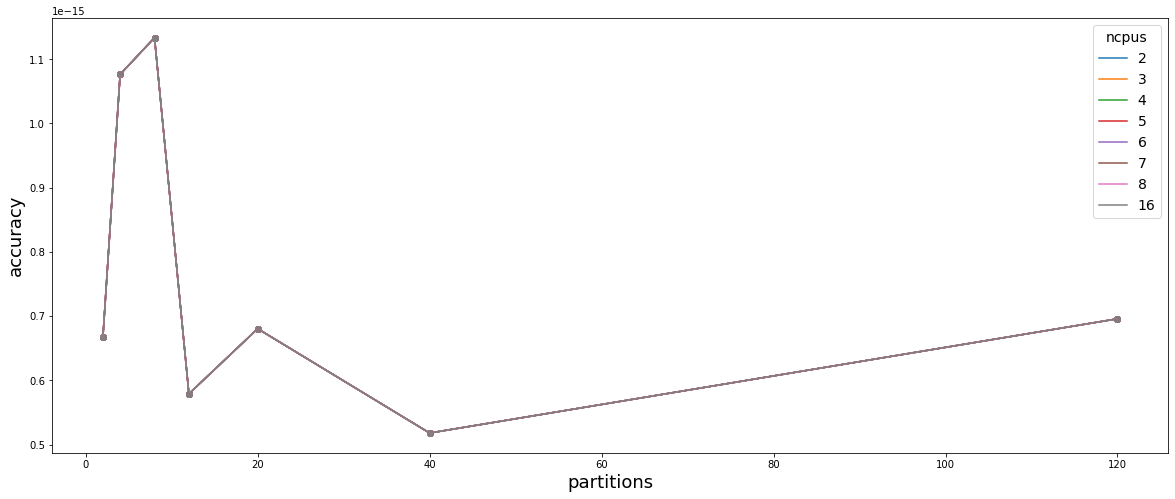

In [20]:
plot_result(data, 'partitions' ,'accuracy', 'ncpus') 

#### nCPUs vs Orthogonality

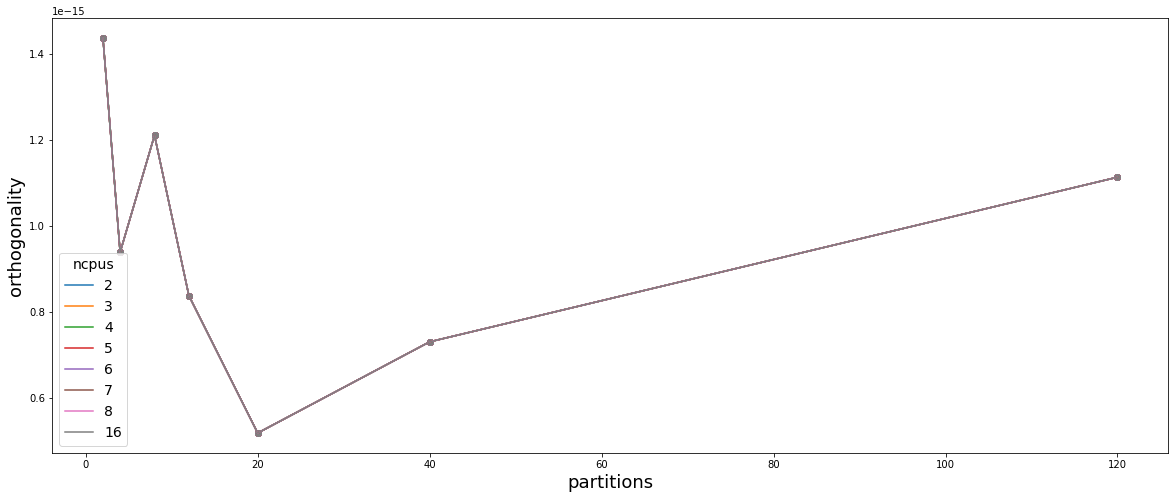

In [21]:
plot_result(data, 'partitions' ,'orthogonality', 'ncpus') 

#### Best metric results

In [22]:
min_time = data[data['time'] == data['time'].min()].copy()
min_time.loc[:, 'Type'] = 'Lowest Time'

min_accuracy = data[data['accuracy'] == data['accuracy'].min()].iloc[3]
min_accuracy['Type'] = 'Lowest Accuracy'

min_orthogonality = data[data['orthogonality'] == data['orthogonality'].min()].iloc[3]
min_orthogonality['Type'] = 'Lowest Orthogonality'

# Append the DataFrames vertically (one under the other)
min_results = min_time.append([min_accuracy, min_orthogonality])

# Reset the index of the appended DataFrame
min_results = min_results.reset_index(drop=True)

# Print the appended DataFrame
min_results

,partitions,time,accuracy,orthogonality,ncpus,Type
0,4.0,0.003887,1.076409e-15,9.390809e-16,2.0,Lowest Time
1,40.0,0.006064,5.180614e-16,7.307084e-16,5.0,Lowest Accuracy
2,20.0,0.005723,6.804615e-16,5.184931e-16,5.0,Lowest Orthogonality


### Built In QR Decomposition

In [23]:
BI_ncpu_1_1 = pd.read_csv('part2_BIQR_ncpus_1_1.csv')
BI_ncpu_1_2 = pd.read_csv('part2_BIQR_ncpus_1_2.csv')
BI_ncpu_2_2 = pd.read_csv('part2_BIQR_ncpus_2_2.csv')
BI_ncpu_2_3 = pd.read_csv('part2_BIQR_ncpus_2_3.csv')
BI_ncpu_3_3 = pd.read_csv('part2_BIQR_ncpus_3_3.csv')


BI_list_cpus = [1+1, 1+2, 2+2, 2+3, 3+3]
BI_new_column = [l for l in BI_list_cpus for _ in range(7)]
# Concatenate the DataFrames using the 'concat()' function
BI_frames = [BI_ncpu_1_1, BI_ncpu_1_2, BI_ncpu_2_2, BI_ncpu_2_3, BI_ncpu_3_3]
BI_data = pd.concat(BI_frames, axis=0, ignore_index=True)
BI_data['ncpus'] = BI_new_column
BI_data.tail()

,partitions,time,accuracy,orthogonality,ncpus
51,8,0.001234,1.133603e-15,1.211107e-15,16
52,12,0.000872,5.791718e-16,8.380420e-16,16
53,20,0.000979,6.804615e-16,5.184931e-16,16
54,40,0.001166,5.180614e-16,7.307084e-16,16
55,120,0.004637,5.491664e-16,8.000673e-16,16


In [24]:
data_difference = data.copy()
data_difference['relative time diff'] =  ((data['time'] - BI_data['time'])/BI_data['time'])
data_difference['accuracy'] =  (data['accuracy'] - BI_data['accuracy'])/BI_data['accuracy']
data_difference['orthogonality'] =  (data['orthogonality'] - BI_data['orthogonality'])/BI_data['orthogonality']

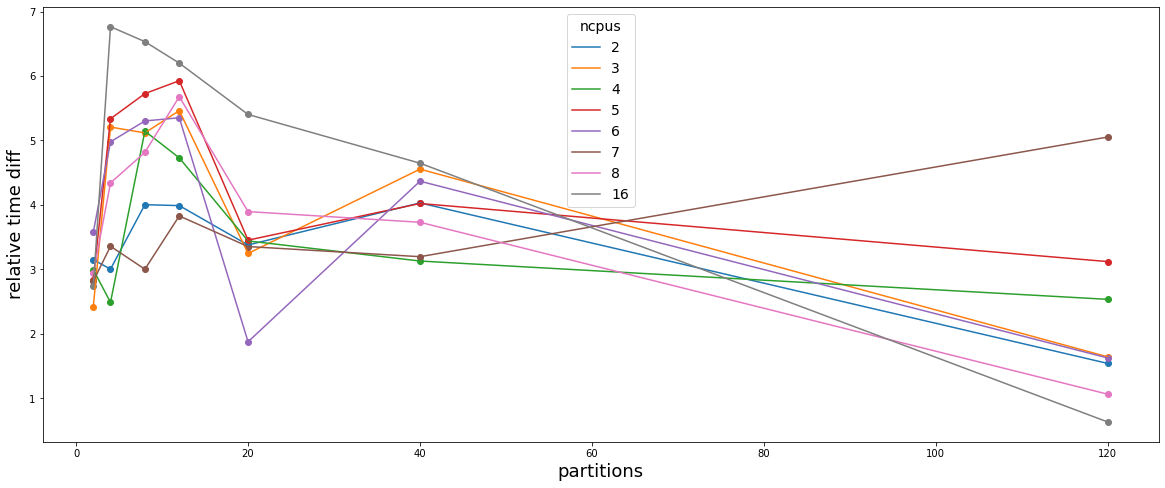

In [25]:
plot_result(data_difference, 'partitions' ,'relative time diff', 'ncpus') 

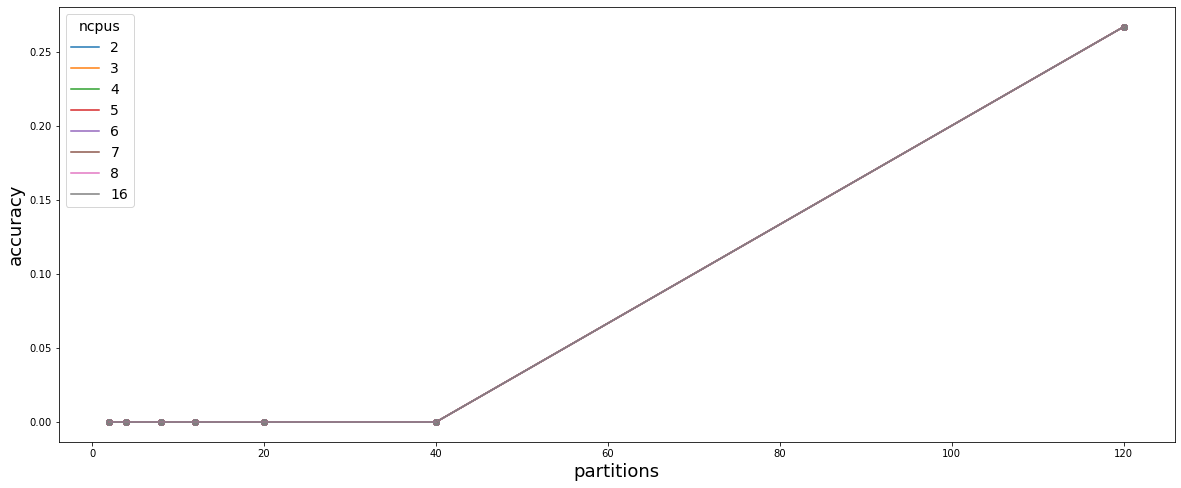

In [26]:
plot_result(data_difference, 'partitions' ,'accuracy', 'ncpus') 

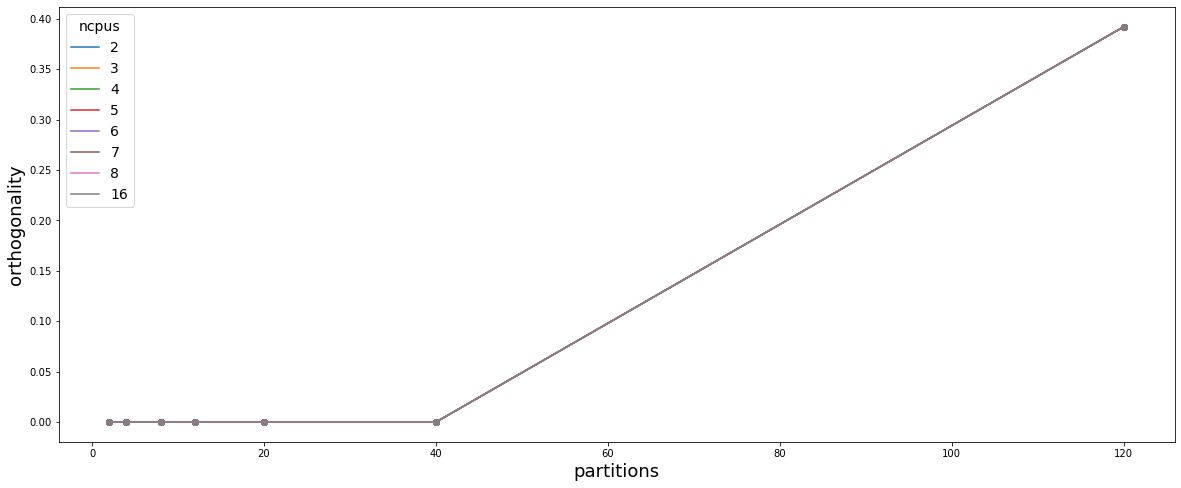

In [27]:
plot_result(data_difference, 'partitions' ,'orthogonality', 'ncpus') 

## Part 3 - Scalability Analysis of Dataset Size

In [28]:
# Data import
DS_ncpu_1_1_nthread_12_12 = pd.read_csv('part3_ncpu_1_1_nthreads_12_12.csv')
DS_ncpu_1_1_nthread_2_2 = pd.read_csv('part3_ncpu_1_1_nthreads_2_2.csv')
DS_ncpu_1_1_nthread_4_4 = pd.read_csv('part3_ncpu_1_1_nthreads_4_4.csv')
DS_ncpu_1_1_nthread_8_8 = pd.read_csv('part3_ncpu_1_1_nthreads_8_8.csv')
DS_ncpu_1_2_nthread_2_2 = pd.read_csv('part3_ncpu_1_2_nthreads_2_2.csv')
DS_ncpu_2_2_nthread_2_2 = pd.read_csv('part3_ncpu_2_2_nthreads_2_2.csv')
DS_ncpu_2_3_nthread_2_2 = pd.read_csv('part3_ncpu_2_3_nthreads_2_2.csv')
DS_ncpu_3_3_nthread_2_2 = pd.read_csv('part3_ncpu_3_3_nthreads_2_2.csv')


# Create a new column on the dataset with the respective number of threads
# list_threads = ['2_2', '4_4', '8_8', '4_12', '12_12', '16_16']
list_threads = [12+12, 2+2, 4+4, 8+8, 2+2, 2+2,2+2,2+2]
list_ncpus = [1+1,1+1, 1+1, 1+1, 1+2, 2+2, 2+3, 3+3]
new_column_threads = [l for l in list_threads for _ in range(16)]
new_column_ncpus = [l for l in list_ncpus for _ in range(16)]

In [29]:
frames = [DS_ncpu_1_1_nthread_12_12, DS_ncpu_1_1_nthread_2_2,DS_ncpu_1_1_nthread_4_4,DS_ncpu_1_1_nthread_8_8,
         DS_ncpu_1_2_nthread_2_2,DS_ncpu_2_2_nthread_2_2,DS_ncpu_2_3_nthread_2_2,DS_ncpu_3_3_nthread_2_2]
data = pd.concat(frames, axis=0, ignore_index=True)
data['nThreads'] = new_column_threads
data['ncpus'] = new_column_ncpus
data.tail()

,partitions,size,time,accuracy,orthogonality,nThreads,ncpus
187,50,1.00,0.006297,1.686581e-15,6.848907e-16,4,16
188,100,0.25,0.007792,8.853570e-16,1.201108e-15,4,16
189,100,0.50,0.007698,9.382702e-16,5.443034e-16,4,16
190,100,0.75,0.007713,1.366991e-15,1.185576e-15,4,16
191,100,1.00,0.007608,1.419261e-15,7.531679e-16,4,16


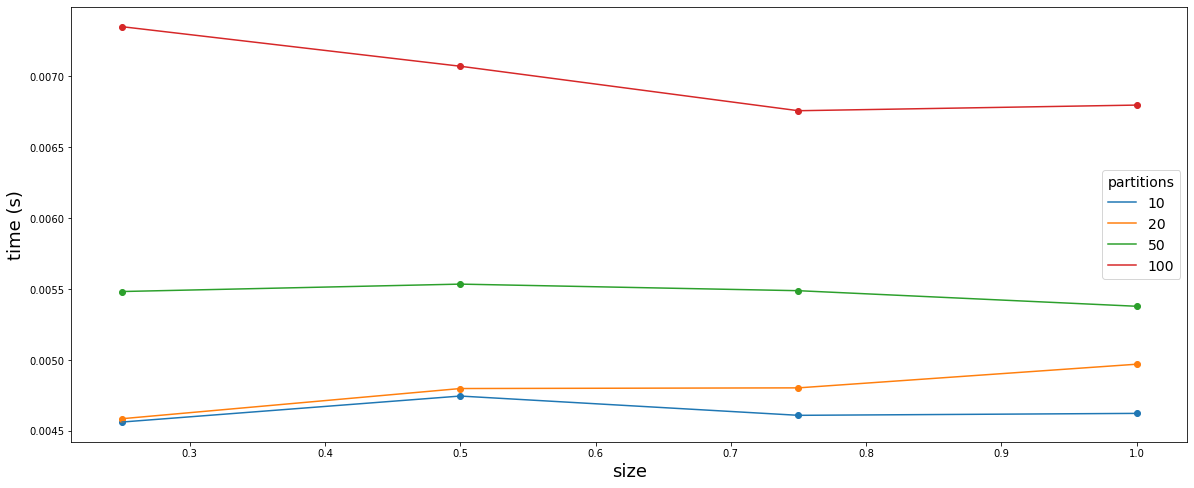

In [30]:
average_values = data.groupby(['size','partitions'])['time'].mean()
average_values = average_values.reset_index()
plot_result(average_values, 'size' ,'time', 'partitions') 

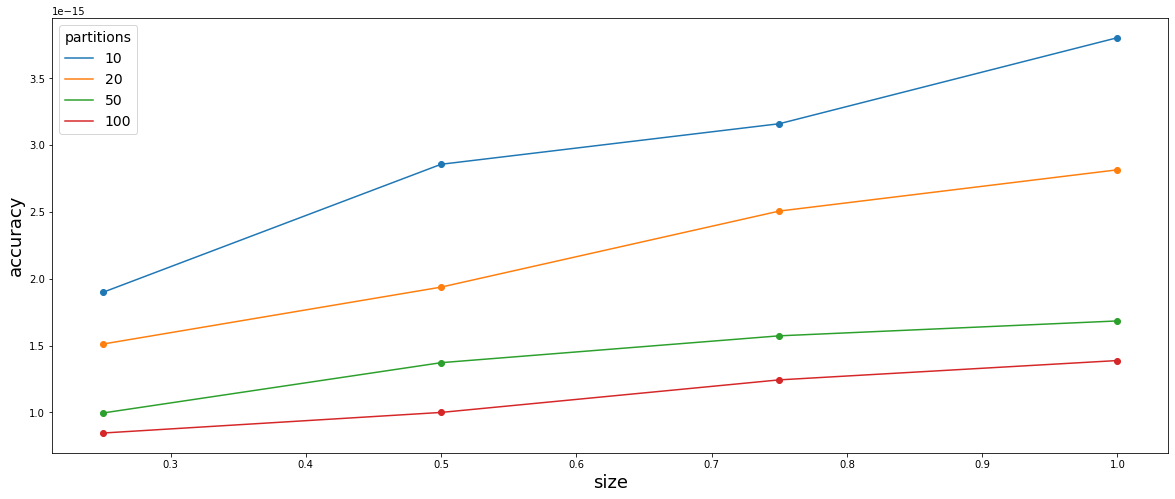

In [31]:
average_values = data.groupby(['size','partitions'])['accuracy'].mean()
average_values = average_values.reset_index()
plot_result(average_values, 'size' ,'accuracy', 'partitions') 

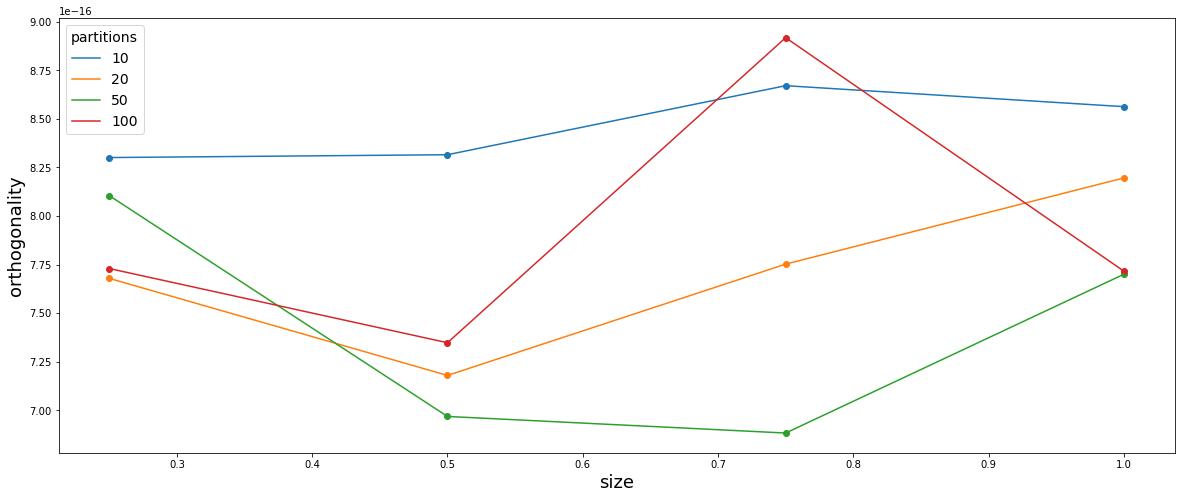

In [32]:
average_values = data.groupby(['size','partitions'])['orthogonality'].mean()
average_values = average_values.reset_index()
plot_result(average_values, 'size' ,'orthogonality', 'partitions') 

In [33]:
grouped_values = data.groupby(['size'])['time'].min()
grouped_values_time = grouped_values.reset_index()
grouped_values_time

grouped_values = data.groupby(['size'])['accuracy'].min()
grouped_values_accuracy = grouped_values.reset_index()
grouped_values_accuracy

grouped_values = data.groupby(['size'])['orthogonality'].min()
grouped_values_orthogonality = grouped_values.reset_index()
grouped_values_orthogonality

,size,orthogonality
0,0.25,4.019721e-16
1,0.50,4.014988e-16
2,0.75,3.367376e-16
3,1.00,4.005283e-16


In [34]:
# Append the DataFrames vertically (one under the other)
min_results = min_time.append([min_accuracy, min_orthogonality])

# Reset the index of the appended DataFrame
min_results = min_results.reset_index(drop=True)

# Print the appended DataFrame
min_results

,partitions,time,accuracy,orthogonality,ncpus,Type
0,4.0,0.003887,1.076409e-15,9.390809e-16,2.0,Lowest Time
1,40.0,0.006064,5.180614e-16,7.307084e-16,5.0,Lowest Accuracy
2,20.0,0.005723,6.804615e-16,5.184931e-16,5.0,Lowest Orthogonality


#### Built in QR Decomposition

In [35]:
# Data import
BI_DS_ncpu_1_1_nthread_12_12 = pd.read_csv('part3_BIQR_ncpu_1_1_nthreads_12_12.csv')
BI_DS_ncpu_1_1_nthread_16_16 = pd.read_csv('part3_BIQR_ncpu_1_1_nthreads_16_16.csv')
BI_DS_ncpu_1_1_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_1_1_nthreads_2_2.csv')
BI_DS_ncpu_1_1_nthread_4_4 = pd.read_csv('part3_BIQR_ncpu_1_1_nthreads_4_4.csv')
BI_DS_ncpu_1_1_nthread_8_8 = pd.read_csv('part3_BIQR_ncpu_1_1_nthreads_8_8.csv')
BI_DS_ncpu_1_2_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_1_2_nthreads_2_2.csv')
BI_DS_ncpu_2_2_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_2_2_nthreads_2_2.csv')
BI_DS_ncpu_2_3_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_2_3_nthreads_2_2.csv')
BI_DS_ncpu_3_3_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_3_3_nthreads_2_2.csv')
BI_DS_ncpu_3_4_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_3_4_nthreads_2_2.csv')
BI_DS_ncpu_4_4_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_4_4_nthreads_2_2.csv')
BI_DS_ncpu_8_8_nthread_2_2 = pd.read_csv('part3_BIQR_ncpu_8_8_nthreads_2_2.csv')

# Create a new column on the dataset with the respective number of threads
# list_threads = ['2_2', '4_4', '8_8', '4_12', '12_12', '16_16']
BI_list_threads = [12+12, 16+16, 2+2, 4+4, 8+8, 2+2, 2+2,2+2,2+2,2+2,2+2,2+2]
BI_list_ncpus = [1+1, 1+1, 1+1, 1+1, 1+1, 1+2, 2+2, 2+3, 3+3,3+4, 4+4, 8+8]
BI_new_column_threads = [l for l in BI_list_threads for _ in range(16)]
BI_new_column_ncpus = [l for l in BI_list_ncpus for _ in range(16)]

In [36]:
BI_frames = [BI_DS_ncpu_1_1_nthread_12_12, BI_DS_ncpu_1_1_nthread_16_16, BI_DS_ncpu_1_1_nthread_2_2, BI_DS_ncpu_1_1_nthread_4_4, BI_DS_ncpu_1_1_nthread_8_8,
         BI_DS_ncpu_1_2_nthread_2_2, BI_DS_ncpu_2_2_nthread_2_2, BI_DS_ncpu_2_3_nthread_2_2, BI_DS_ncpu_3_3_nthread_2_2, BI_DS_ncpu_3_4_nthread_2_2,
         BI_DS_ncpu_4_4_nthread_2_2, BI_DS_ncpu_8_8_nthread_2_2]
BI_data = pd.concat(BI_frames, axis=0, ignore_index=True)
BI_data['nThreads'] = BI_new_column_threads
BI_data['ncpus'] = BI_new_column_ncpus
BI_data.tail()

,partitions,size,time,accuracy,orthogonality,nThreads,ncpus
187,50,1.00,0.001583,1.686581e-15,6.848907e-16,4,16
188,100,0.25,0.002108,8.853570e-16,1.201108e-15,4,16
189,100,0.50,0.003627,9.382702e-16,5.443034e-16,4,16
190,100,0.75,0.002078,1.366991e-15,1.185576e-15,4,16
191,100,1.00,0.002179,1.419261e-15,7.531679e-16,4,16


In [37]:
data_difference = data.copy()
data_difference['relative time diff'] =  ((data['time'] - BI_data['time'])/BI_data['time'])
data_difference['accuracy'] =  (data['accuracy'] - BI_data['accuracy'])/BI_data['accuracy']
data_difference['orthogonality'] =  (data['orthogonality'] - BI_data['orthogonality'])/BI_data['orthogonality']

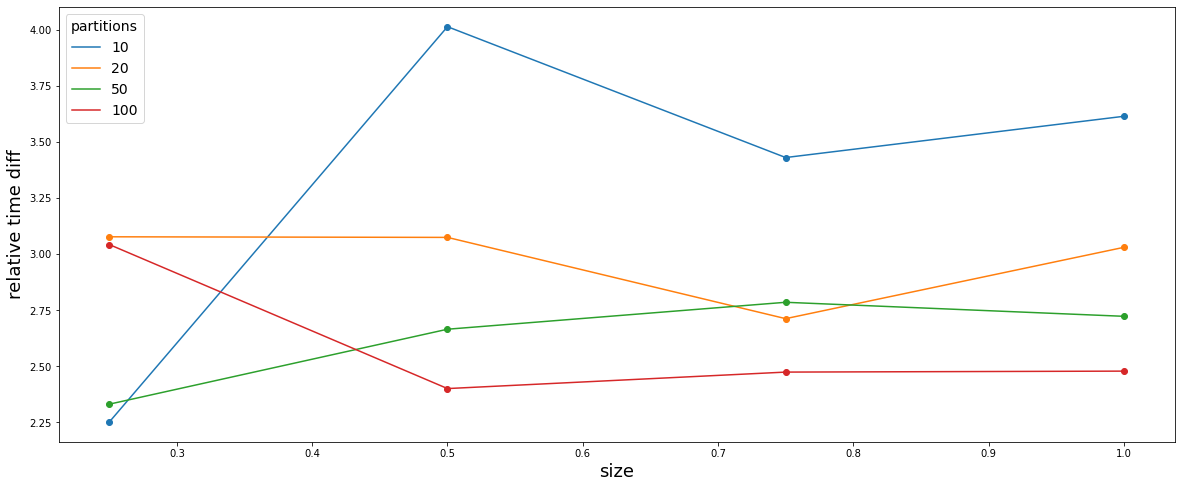

In [38]:
average_values = data_difference.groupby(['size','partitions'])['relative time diff'].mean()
average_values = average_values.reset_index()
plot_result(average_values, 'size' ,'relative time diff', 'partitions') 

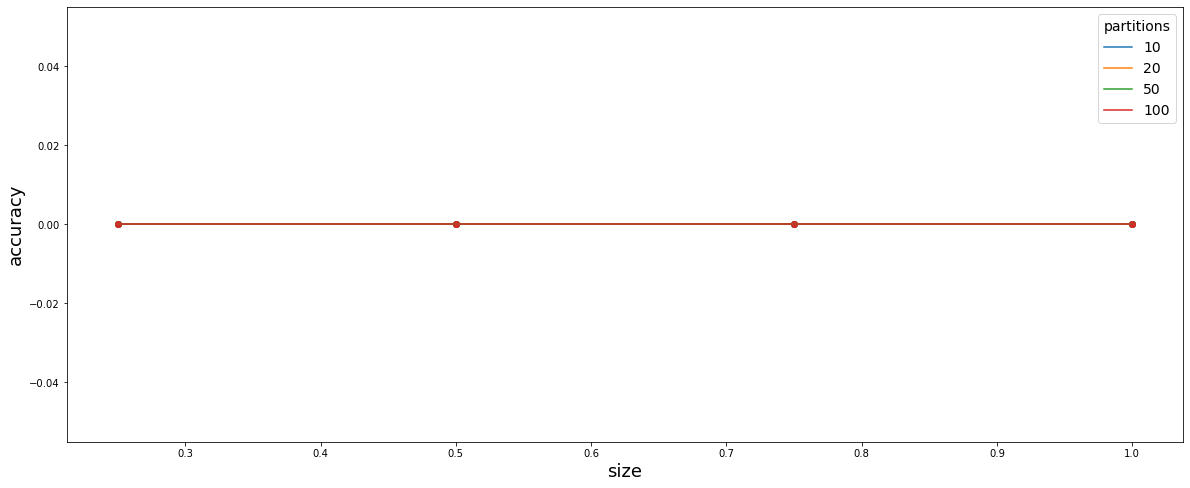

In [39]:
average_values = data_difference.groupby(['size','partitions'])['accuracy'].mean()
average_values = average_values.reset_index()
plot_result(average_values, 'size' ,'accuracy', 'partitions') 

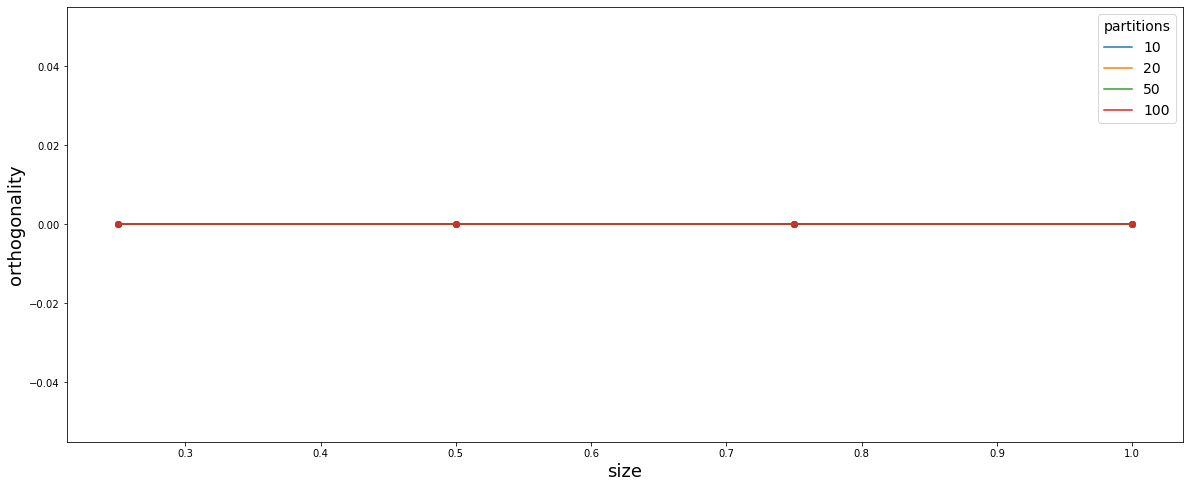

In [40]:
average_values = data_difference.groupby(['size','partitions'])['orthogonality'].mean()
average_values = average_values.reset_index()
plot_result(average_values, 'size' ,'orthogonality', 'partitions') 

In [41]:
min_time = BI_data[BI_data['time'] == BI_data['time'].min()].copy()
min_time.loc[:, 'Type'] = 'Lowest Time'

min_accuracy = BI_data[BI_data['accuracy'] == BI_data['accuracy'].min()]
min_accuracy['Type'] = 'Lowest Accuracy'

min_orthogonality = BI_data[BI_data['orthogonality'] == BI_data['orthogonality'].min()]
min_orthogonality['Type'] = 'Lowest Orthogonality'

# Append the DataFrames vertically (one under the other)
min_results = min_time.append([min_accuracy, min_orthogonality])

# Reset the index of the appended DataFrame
min_results = min_results.reset_index(drop=True)

# Print the appended DataFrame
min_results

<ipython-input-41-70cc263f7d33>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_accuracy['Type'] = 'Lowest Accuracy'
<ipython-input-41-70cc263f7d33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_orthogonality['Type'] = 'Lowest Orthogonality'


,partitions,size,time,accuracy,orthogonality,nThreads,ncpus,Type
0,10,0.50,0.000871,3.319565e-15,5.889241e-16,8,2,Lowest Time
1,100,0.25,0.001711,7.679911e-16,7.774520e-16,4,6,Lowest Accuracy
2,10,0.75,0.000978,3.298952e-15,3.367376e-16,4,2,Lowest Orthogonality


In [42]:
data = data[data['size'] == 0.75]

min_time = data[data['time'] == data['time'].min()].copy()
min_time.loc[:, 'Type'] = 'Lowest Time'

min_accuracy = data[data['accuracy'] == data['accuracy'].min()]
min_accuracy['Type'] = 'Lowest Accuracy'

min_orthogonality = data[data['orthogonality'] == data['orthogonality'].min()]
min_orthogonality['Type'] = 'Lowest Orthogonality'

# Append the DataFrames vertically (one under the other)
min_results = min_time.append([min_accuracy, min_orthogonality])

# Reset the index of the appended DataFrame
min_results = min_results.reset_index(drop=True)

# Print the appended DataFrame
min_results

<ipython-input-42-c3922037f221>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_accuracy['Type'] = 'Lowest Accuracy'
<ipython-input-42-c3922037f221>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_orthogonality['Type'] = 'Lowest Orthogonality'


,partitions,size,time,accuracy,orthogonality,nThreads,ncpus,Type
0,10,0.75,0.004140,3.259791e-15,8.015335e-16,4,3,Lowest Time
1,100,0.75,0.006285,1.144702e-15,7.531934e-16,4,7,Lowest Accuracy
2,10,0.75,0.004288,3.298952e-15,3.367376e-16,4,2,Lowest Orthogonality


#### Best Tradeoff: Total Metric

In [44]:
data['Total_Metric'] = (data['accuracy'] + data['orthogonality'])*data['time']

data = data[data['size'] == 0.75]

min_Total_Metric = data[data['Total_Metric'] == data['Total_Metric'].min()].copy()
min_Total_Metric.loc[:, 'Type'] = 'Lowest Total_Metric'

# Reset the index of the appended DataFrame
min_results = min_Total_Metric.reset_index(drop=True)

# Print the appended DataFrame
min_results

,partitions,size,time,accuracy,orthogonality,nThreads,ncpus,Total_Metric,Type
0,50,0.75,0.004793,1.622374e-15,6.185549e-16,4,5,1.074008e-17,Lowest Total_Metric


## Part 4 - Local Environment Comparison

In [45]:
# Data import
local_env = pd.read_csv('part4_numpy_comparation.csv')
dist_env = pd.read_csv('part3_ncpu_1_1_nthreads_2_2.csv')
dist_env = dist_env[dist_env['partitions']==10]
dist_env = dist_env.drop('partitions', axis=1)
dist_env

,size,time,accuracy,orthogonality
0,0.25,0.005103,1.817819e-15,8.172358e-16
1,0.50,0.004446,2.987393e-15,1.231979e-15
2,0.75,0.004288,3.298952e-15,3.367376e-16
3,1.00,0.004479,3.559064e-15,7.124453e-16


In [46]:
local_env

,size,time,accuracy,orthogonality
0,0.25,0.281789,9.695674e-15,3.723650e-15
1,0.50,0.282869,9.695674e-15,3.723650e-15
2,0.75,0.276090,9.695674e-15,3.723650e-15
3,1.00,0.279062,9.695674e-15,3.723650e-15


In [47]:
data_difference = dist_env.copy()
data_difference['relative time diff'] =  ((local_env['time'] - dist_env['time'])/dist_env['time'])
data_difference['accuracy'] =  (local_env['accuracy'] - BI_data['accuracy'])/dist_env['accuracy']
data_difference['orthogonality'] =  (local_env['orthogonality'] - dist_env['orthogonality'])/dist_env['orthogonality']

Text(0, 0.5, 'Relative Difference')

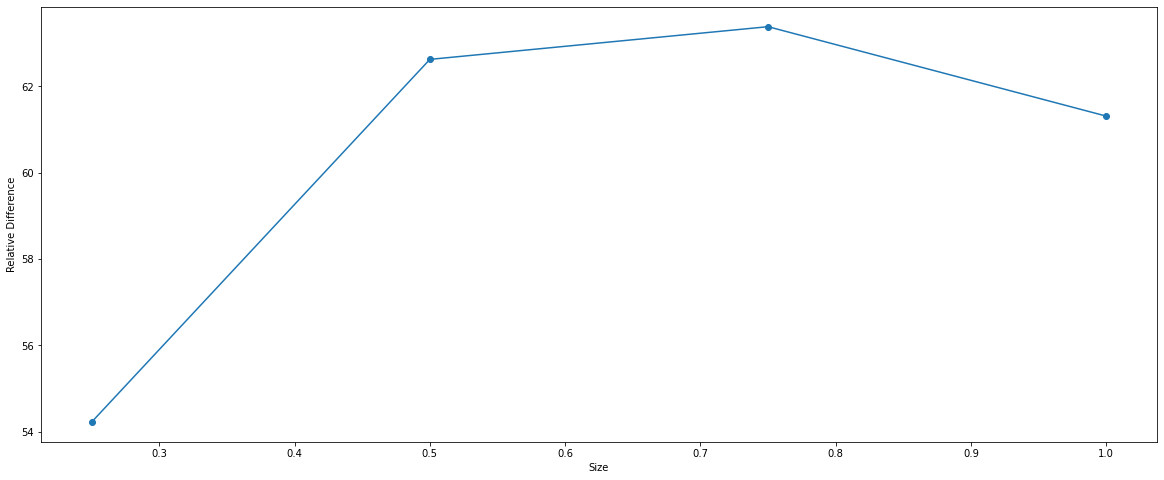

In [50]:
fig = plt.figure(figsize = (20,8))
plt.plot(data_difference['size'], data_difference['relative time diff'])
plt.scatter(data_difference['size'], data_difference['relative time diff'])
plt.xlabel("Size")
plt.ylabel("Relative Difference")